In [ ]:
#Load data
import pandas as pd
import numpy as np

model = pd.read_csv('/content/german_credit_model_data.csv')
apps_data = pd.read_csv('/content/german_credit_new_apps_data.csv')

In [ ]:
model.head()

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,4e561ef3-a927-4107-aa12-18ac5772ec63,less_0,6,all_credits_paid_back,car_used,250,less_100,1_to_4,2,male,none,2,savings_insurance,28,stores,rent,1,skilled,1,none,yes,Risk
1,2663eaee-4f6b-4c84-b816-0b589b6690c8,less_0,14,all_credits_paid_back,appliances,1431,less_100,unemployed,1,female,none,1,car_other,25,stores,own,1,skilled,1,none,yes,Risk
2,c1324b0f-7b7d-42d5-896b-ee81988e54f3,greater_200,5,credits_paid_to_date,car_used,250,less_100,4_to_7,3,male,none,2,savings_insurance,42,none,rent,1,skilled,1,none,yes,No Risk
3,c199d5c4-8b0e-4f86-8d36-9b3528ed69b0,less_0,11,all_credits_paid_back,furniture,2016,less_100,less_1,1,female,none,1,car_other,34,bank,own,1,unemployed,1,none,yes,No Risk
4,c8b70d96-763d-4af5-835a-fc8e1008cfa1,less_0,4,credits_paid_to_date,car_new,250,less_100,unemployed,1,female,none,1,real_estate,29,none,rent,1,skilled,1,none,yes,No Risk


In [ ]:
#check for duplicity
model.duplicated().sum()

18

In [ ]:
model = model.drop_duplicates()

In [ ]:
model.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [ ]:
apps_data.head()

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,3,savings_insurance,32,none,own,1,skilled,1,none,yes
1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,2,savings_insurance,37,stores,own,2,skilled,1,none,yes
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,3,real_estate,28,none,own,2,skilled,1,yes,no
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,2,savings_insurance,32,none,own,1,skilled,1,none,yes
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,3,unknown,57,none,own,2,skilled,1,none,yes


In [ ]:
model.shape

(4882, 21)

In [ ]:
apps_data.shape

(100, 21)

In [ ]:
for i in model.columns:
  print(i)
  print(model[i].unique())
  print(' ')

CustomerID
['4e561ef3-a927-4107-aa12-18ac5772ec63'
 '2663eaee-4f6b-4c84-b816-0b589b6690c8'
 'c1324b0f-7b7d-42d5-896b-ee81988e54f3' ...
 'db501d22-e0c9-4f38-bf05-7f2c1df35395'
 '802055d6-6aa7-4532-bf1c-0b8b114b483d'
 '53094239-82f4-4b14-b2e9-7a0355a10839']
 
CheckingStatus
['less_0' 'greater_200' '0_to_200' 'no_checking']
 
LoanDuration
[ 6 14  5 11  4 16 29 43 24 32 20 28 13 10  7 33 37 25 18 35 23 12  8 22
 15 41 26 40 50 31 19 48 17 21 46 27 36  9 44 30 42 45 39 34 38 53 61 51
 63 47 54 49 60 59 56 62 57 52]
 
CreditHistory
['all_credits_paid_back' 'credits_paid_to_date' 'prior_payments_delayed'
 'outstanding_credit' 'no_credits']
 
LoanPurpose
['car_used' 'appliances' 'furniture' 'car_new' 'radio_tv' 'vacation'
 'repairs' 'business' 'other' 'retraining' 'education']
 
LoanAmount
[ 250 1431 2016 ... 6536 1597 4152]
 
ExistingSavings
['less_100' '100_to_500' '500_to_1000' 'greater_1000' 'unknown']
 
EmploymentDuration
['1_to_4' 'unemployed' '4_to_7' 'less_1' 'greater_7']
 
Installment

In [ ]:
#Target encoding (on training data)
model['Risk'] = model['Risk'].apply(lambda x: 1 if x == 'Risk' else 0)

In [ ]:
data_cont = model[['LoanDuration', 'LoanAmount', 'InstallmentPercent',
                   'CurrentResidenceDuration', 'Age', 'ExistingCreditsCount', 'Dependents', 'Risk']]

In [ ]:
for i in list(model.columns):
  print(i)
  if i not in ['LoanDuration', 'LoanAmount', 'InstallmentPercent',
                   'CurrentResidenceDuration', 'Age', 'ExistingCreditsCount', 'Dependents', 'Risk']:
    dummy = pd.get_dummies(model[i])
    dummy.columns = [i + '_' + str(x) for x in dummy.columns]
    #df_trans = pd.concat([data_cont, dummy_vars], axis=1)
    data_cont = pd.concat([data_cont, dummy], axis=1)
    #print(data_cont.head())

CheckingStatus
LoanDuration
CreditHistory
LoanPurpose
LoanAmount
ExistingSavings
EmploymentDuration
InstallmentPercent
Sex
OthersOnLoan
CurrentResidenceDuration
OwnsProperty
Age
InstallmentPlans
Housing
ExistingCreditsCount
Job
Dependents
Telephone
ForeignWorker
Risk


In [ ]:
data_cont.head()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents,Risk,CheckingStatus_0_to_200,CheckingStatus_greater_200,CheckingStatus_less_0,CheckingStatus_no_checking,CreditHistory_all_credits_paid_back,CreditHistory_credits_paid_to_date,CreditHistory_no_credits,CreditHistory_outstanding_credit,CreditHistory_prior_payments_delayed,LoanPurpose_appliances,LoanPurpose_business,LoanPurpose_car_new,LoanPurpose_car_used,LoanPurpose_education,LoanPurpose_furniture,LoanPurpose_other,LoanPurpose_radio_tv,LoanPurpose_repairs,LoanPurpose_retraining,LoanPurpose_vacation,ExistingSavings_100_to_500,ExistingSavings_500_to_1000,ExistingSavings_greater_1000,ExistingSavings_less_100,ExistingSavings_unknown,EmploymentDuration_1_to_4,EmploymentDuration_4_to_7,EmploymentDuration_greater_7,EmploymentDuration_less_1,EmploymentDuration_unemployed,Sex_female,Sex_male,OthersOnLoan_co-applicant,OthersOnLoan_guarantor,OthersOnLoan_none,OwnsProperty_car_other,OwnsProperty_real_estate,OwnsProperty_savings_insurance,OwnsProperty_unknown,InstallmentPlans_bank,InstallmentPlans_none,InstallmentPlans_stores,Housing_free,Housing_own,Housing_rent,Job_management_self-employed,Job_skilled,Job_unemployed,Job_unskilled,Telephone_none,Telephone_yes,ForeignWorker_no,ForeignWorker_yes
0,6,250,2,2,28,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,14,1431,1,1,25,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
2,5,250,3,2,42,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
3,11,2016,1,1,34,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
4,4,250,1,1,29,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1


In [ ]:
data_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4882 entries, 0 to 4899
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   LoanDuration                          4882 non-null   int64
 1   LoanAmount                            4882 non-null   int64
 2   InstallmentPercent                    4882 non-null   int64
 3   CurrentResidenceDuration              4882 non-null   int64
 4   Age                                   4882 non-null   int64
 5   ExistingCreditsCount                  4882 non-null   int64
 6   Dependents                            4882 non-null   int64
 7   Risk                                  4882 non-null   int64
 8   CheckingStatus_0_to_200               4882 non-null   uint8
 9   CheckingStatus_greater_200            4882 non-null   uint8
 10  CheckingStatus_less_0                 4882 non-null   uint8
 11  CheckingStatus_no_checking            4882 

In [ ]:
target = 'Risk'
features = [x for x in list(data_cont.columns) if x != target]

In [ ]:
from collections import Counter
Counter(data_cont['Risk'])

Counter({0: 3245, 1: 1637})

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_cont[features], data_cont[target], test_size=0.1,
                                                    random_state = 32)

In [ ]:
history = model.fit(x_train, y_train, epochs=150, 
                  validation_data=(x_test, y_test))

Epoch 1/150
138/138 [==============================] - 1s 3ms/step - loss: 3.5755 - accuracy: 0.6101 - val_loss: 0.7819 - val_accuracy: 0.6176
Epoch 2/150
138/138 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.6670 - val_loss: 0.7110 - val_accuracy: 0.6524
Epoch 3/150
138/138 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6772 - val_loss: 0.8827 - val_accuracy: 0.6258
Epoch 4/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7157 - val_loss: 0.7330 - val_accuracy: 0.6544
Epoch 5/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7161 - val_loss: 0.7375 - val_accuracy: 0.6564
Epoch 6/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7364 - val_loss: 0.5862 - val_accuracy: 0.6748
Epoch 7/150
138/138 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7300 - val_loss: 0.6584 - val_accuracy: 0.6564

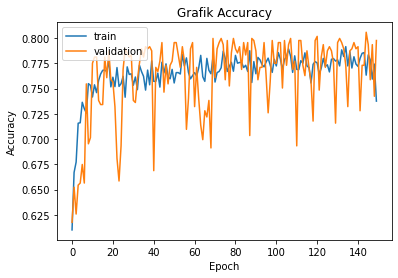

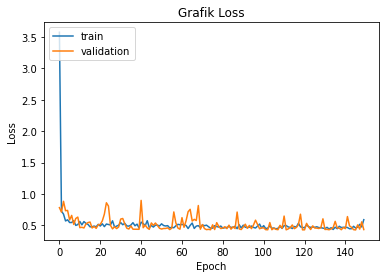

In [ ]:
import matplotlib.pyplot as plt
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pred = model.predict_classes(x_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       321
           1       0.73      0.65      0.69       168

    accuracy                           0.80       489
   macro avg       0.78      0.76      0.77       489
weighted avg       0.79      0.80      0.79       489

[[280  41]
 [ 58 110]]
0.7975460122699386


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
def plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[280  41]
 [ 58 110]]


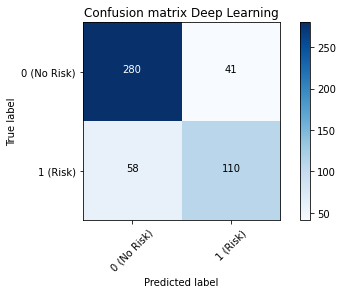

In [ ]:
import itertools
dt_cm = confusion_matrix(y_test, pred)
plot(dt_cm, classes=["0 (No Risk)","1 (Risk)"], title='Confusion matrix Deep Learning')

In [ ]:
x_test.shape

(489, 60)

In [ ]:
data_cont.head()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents,Risk,CheckingStatus_0_to_200,CheckingStatus_greater_200,CheckingStatus_less_0,CheckingStatus_no_checking,CreditHistory_all_credits_paid_back,CreditHistory_credits_paid_to_date,CreditHistory_no_credits,CreditHistory_outstanding_credit,CreditHistory_prior_payments_delayed,LoanPurpose_appliances,LoanPurpose_business,LoanPurpose_car_new,LoanPurpose_car_used,LoanPurpose_education,LoanPurpose_furniture,LoanPurpose_other,LoanPurpose_radio_tv,LoanPurpose_repairs,LoanPurpose_retraining,LoanPurpose_vacation,ExistingSavings_100_to_500,ExistingSavings_500_to_1000,ExistingSavings_greater_1000,ExistingSavings_less_100,ExistingSavings_unknown,EmploymentDuration_1_to_4,EmploymentDuration_4_to_7,EmploymentDuration_greater_7,EmploymentDuration_less_1,EmploymentDuration_unemployed,Sex_female,Sex_male,OthersOnLoan_co-applicant,OthersOnLoan_guarantor,OthersOnLoan_none,OwnsProperty_car_other,OwnsProperty_real_estate,OwnsProperty_savings_insurance,OwnsProperty_unknown,InstallmentPlans_bank,InstallmentPlans_none,InstallmentPlans_stores,Housing_free,Housing_own,Housing_rent,Job_management_self-employed,Job_skilled,Job_unemployed,Job_unskilled,Telephone_none,Telephone_yes,ForeignWorker_no,ForeignWorker_yes
0,6,250,2,2,28,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,14,1431,1,1,25,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
2,5,250,3,2,42,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
3,11,2016,1,1,34,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
4,4,250,1,1,29,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
